In [40]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split

In [41]:
# read data
data = pd.read_parquet("test-00000-of-00001.parquet")[:20]

In [42]:
# see head of data
data.head()

,text,label
0,I love sci-fi and am willing to put up with a ...,0
1,"Worth the entertainment value of a rental, esp...",0
2,its a totally average film with a few semi-alr...,0
3,STAR RATING: ***** Saturday Night **** Friday ...,0
4,"First off let me say, If you haven't enjoyed a...",0


In [43]:
# As we can see there is no nan value in our dataset
data.isna().sum()

text     0
label    0
dtype: int64

In [44]:
# the dataset has 50000 rows and 2 columns
data.shape

(20, 2)

In [45]:
# Surprisingly there are some duplicate comments
data.nunique()

text     20
label     1
dtype: int64

In [46]:
uniq_data_rev = np.unique(data["label"],return_counts=True)
review = uniq_data_rev[0]
count = uniq_data_rev[1]

In [47]:
# Now we can see duplicate comments below:
review[count > 1]

array([0], dtype=int64)

In [48]:
# let's remove (drop) duplicates rows
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)

In [49]:
# data shape after drop duuplicates (now it has 49582 rows instead of 50000)
data.shape

(20, 2)

In [50]:
# this library converts any word to its stem (مصدر)
stem = PorterStemmer()

In [51]:
# punctuation in english like . " ; ' and others should be removed from text
# here we got a list of english punctuations to not consider them
punctuations = list(string.punctuation)

In [52]:
#stop words like "and" should be removed from text because they won't help the algorithm to work better
# and they increase the number of features (they are useless features)
# here we got a list of english stopwords
stop_words = stopwords.words("english")

In [53]:
#let's make a function which do "text_clearing"
def text_cleaner(text):    
    # make text lower case
    lowtext = text.lower()
    
    #clear html tags from text
    no_htmltag_text = BeautifulSoup(lowtext).getText()
    
    # word tokenize text
    tokens = word_tokenize(no_htmltag_text)
    
    # fine_tokens will contains words which are sutable to be a feature
    fine_tokens = list()
    for tok in tokens:
        if (not tok.isdigit()) and (tok not in punctuations) and (tok not in stop_words):
            stemed_tok= stem.stem(tok)
            fine_tokens.append(stemed_tok)
    cleaned_text = " ".join(fine_tokens)
    return cleaned_text

In [54]:
# just an example of how text_cleaner def works
text_cleaner("A wonderful little production. <br /><br />The...")

'wonder littl product ...'

In [55]:
# apply the function on data (clearing text of review column of data)
data['text'] = data['text'].apply(text_cleaner)

In [56]:
data["text"].head()

0    love sci-fi will put lot sci-fi movies/tv usua...
1    worth entertain valu rental especi like action...
2    total averag film semi-alright action sequenc ...
3    star rate saturday night friday night friday m...
4    first let say n't enjoy van damm movi sinc blo...
Name: text, dtype: object

In [57]:
dlis = []
for d in data["text"]:
    dlis.append(len(d.split(" ")))

(array([1., 1., 3., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
        0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]),
 array([ 59.  ,  61.94,  64.88,  67.82,  70.76,  73.7 ,  76.64,  79.58,
         82.52,  85.46,  88.4 ,  91.34,  94.28,  97.22, 100.16, 103.1 ,
        106.04, 108.98, 111.92, 114.86, 117.8 , 120.74, 123.68, 126.62,
        129.56, 132.5 , 135.44, 138.38, 141.32, 144.26, 147.2 , 150.14,
        153.08, 156.02, 158.96, 161.9 , 164.84, 167.78, 170.72, 173.66,
        176.6 , 179.54, 182.48, 185.42, 188.36, 191.3 , 194.24, 197.18,
        200.12, 203.06, 206.  ]),
 <BarContainer object of 50 artists>)

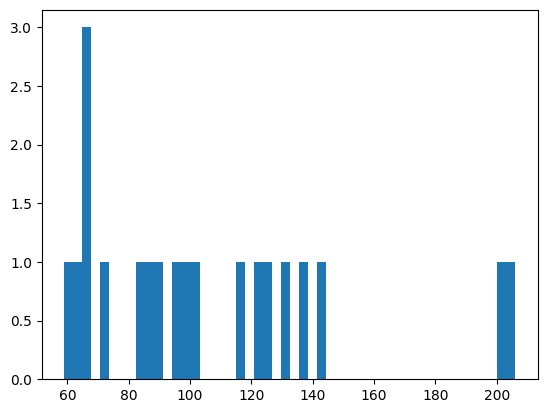

In [58]:
import matplotlib.pyplot as plt
plt.hist(dlis,bins=50)
# so max len should be 300 in my openion

In [59]:
data_text = []
for i in range(len(data)):
    d = (data["text"][i].split(" "))[:300]
    for s in range(300 - len(d)):
        d.append("<pad>")
    data_text.append(d)
        

In [60]:
# from keras.preprocessing.text import Tokenizer
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(data["text"])

In [61]:
# encoded = tokenizer.texts_to_sequences(data["text"])

In [62]:
# from keras.preprocessing.sequence import pad_sequences
# paded = pad_sequences(encoded,maxlen=100,padding="post")

In [63]:
from gensim.models import Word2Vec

sentences = data_text

model = Word2Vec(sentences,min_count=1)

c:\users\mohammad\appdata\local\programs\python\python38\lib\site-packages\gensim\models\base_any2vec.py:322: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(


In [64]:
# list(model.wv.vocab)

In [65]:
model.wv.__getitem__("idea")

array([-0.00281086, -0.00582743,  0.00385409, -0.00015076, -0.01512071,
       -0.01947593, -0.0076694 ,  0.00935048,  0.02243316, -0.00626046,
       -0.00800587,  0.00901211, -0.012091  , -0.00787277,  0.01202563,
       -0.00888254, -0.01747866,  0.00383031,  0.00453406, -0.00115861,
        0.0055733 ,  0.01191551,  0.00950265,  0.01318929,  0.00501063,
        0.00644541, -0.00237291, -0.01136323,  0.01112186, -0.01118645,
        0.00876825,  0.00380243,  0.00550717, -0.02034295,  0.00124532,
        0.00136779,  0.000965  , -0.00505904, -0.00474375, -0.00201678,
       -0.00500102, -0.00917562,  0.00564252,  0.01490801, -0.00485878,
        0.01645022, -0.01707733, -0.00313226,  0.01507907,  0.0079564 ,
        0.01654629, -0.0097253 , -0.00934053,  0.01401316,  0.00292984,
        0.00104117,  0.00156603,  0.00533124,  0.00345733, -0.00326908,
        0.00231214, -0.00493189,  0.00585195, -0.00957273, -0.0087679 ,
        0.01049494,  0.01210383,  0.01354942,  0.00602531,  0.00

In [66]:
tok_array = []
for sentence in data_text:
    sent_array = []
    for word in sentence:
        word_vect = model.wv.__getitem__(word)
        sent_array.append(np.asarray(word_vect))
    else:
        tok_array.append(np.asarray(sent_array))
        
tok_array = np.asarray(tok_array)

In [80]:
tok_array.shape

(20, 300, 100)

In [68]:
data["label"].shape

(20,)

In [69]:
#spliting data to train and test sample
X_train, X_test, y_train, y_test = train_test_split(tok_array,data["label"],test_size=0.333,random_state=42)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

ValueError: Found array with dim 3. KNeighborsClassifier expected <= 2.

In [76]:
number = len(list(model.wv.vocab))

AttributeError: 'Sequential' object has no attribute 'wv'

In [77]:
number

964

In [72]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,Conv1D
import keras

In [93]:
model = Sequential()
# model.add(Embedding(input_dim=(number+1),output_dim=50))
model.add(Conv1D(filters=8,kernel_size=3,strides=1,padding="same",input_shape=(300,100)))
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

In [94]:
#compile
model.compile(
    metrics = keras.metrics.BinaryAccuracy(),
    optimizer= keras.optimizers.Adam(learning_rate=0.0001),
    loss=keras.losses.BinaryCrossentropy()

)

In [95]:
model.fit(X_train,y_train,epochs=5,verbose=1,validation_split=0.33)


Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.7128 - binary_accuracy: 0.0000e+00 - val_loss: 0.7089 - val_binary_accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 34ms/step - loss: 0.7112 - binary_accuracy: 0.0000e+00 - val_loss: 0.7074 - val_binary_accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 36ms/step - loss: 0.7098 - binary_accuracy: 0.0000e+00 - val_loss: 0.7058 - val_binary_accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 33ms/step - loss: 0.7083 - binary_accuracy: 0.0000e+00 - val_loss: 0.7043 - val_binary_accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 34ms/step - loss: 0.7069 - binary_accuracy: 0.0000e+00 - val_loss: 0.7029 - val_binary_accuracy: 0.0000e+00
